In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Minimalan broj boja: 100


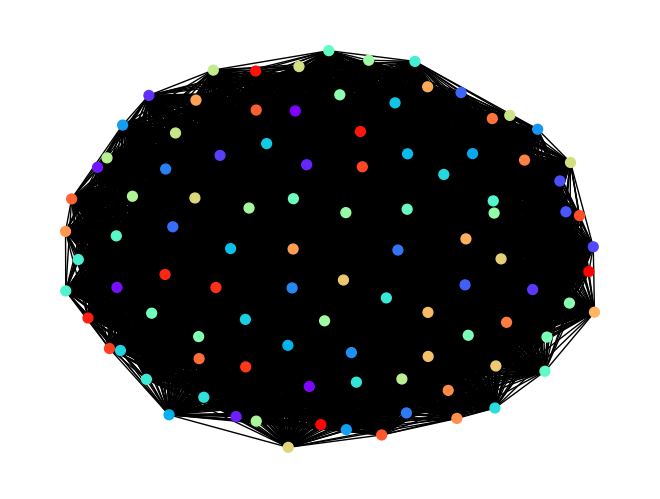

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def brute_force_algorithm(G):
    colors = {}
    available_colors = set()

    for node in G.nodes():
        neighbor_colors = {colors[neighbor] for neighbor in G.neighbors(node) if neighbor in colors}
        new_color = next((c for c in range(len(G)) if c not in neighbor_colors), len(G))
        colors[node] = new_color
        available_colors.add(new_color)

    return len(available_colors), colors

G = nx.complete_graph(100)
min_colors, coloring = brute_force_algorithm(G)
print("Minimalan broj boja:", min_colors)

node_colors = [coloring[node] if node in coloring else 0 for node in G.nodes()]  # Za svaki slučaj dodajemo proveru
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=False, node_color=node_colors, cmap=plt.cm.rainbow, node_size=50)
plt.show()

In [4]:
graph2 = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}
min_colors, coloring = brute_force_algorithm(graph2)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph2)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

AttributeError: 'dict' object has no attribute 'nodes'

In [ ]:
import random
import networkx as nx

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.code = self.random_coloring()
        self.fitness = self.calc_fitness()

    def random_coloring(self):
        coloring = {}
        nodes = list(self.graph.nodes())
        for node in nodes:
            coloring[node] = random.randint(0, len(nodes) - 1)
        return coloring

    def calc_fitness(self):
        # Proveravamo da li susedni čvorovi imaju istu boju
        conflicts = 0
        for node in self.graph:
            for neighbor in self.graph.neighbors(node):
                if self.code[node] == self.code[neighbor]:
                    conflicts += 1
        # Manje konflikata i manje boja znači bolji fitness
        unique_colors = len(set(self.code.values()))
        return -conflicts - unique_colors

def selection(population, tournament_size):
    chosen = random.sample(population, tournament_size)
    return max(chosen, key=lambda x: x.fitness)

def crossover(parent1, parent2):
    child1_code = parent1.code.copy()
    child2_code = parent2.code.copy()
    split_point = random.randint(0, len(child1_code))

    child1_nodes = list(child1_code.keys())[:split_point + 1]
    child2_nodes = list(child2_code.keys())[split_point:]

    for node in child1_nodes:
        child2_code[node] = child1_code[node]
    for node in child2_nodes:
        child1_code[node] = child2_code[node]

    child1 = Individual(parent1.graph)
    child2 = Individual(parent1.graph)
    child1.code = child1_code
    child2.code = child2_code

    child1.fitness = child1.calc_fitness()
    child2.fitness = child2.calc_fitness()

    return child1, child2

def mutation(individual, mutation_rate):
    for node in individual.code:
        if random.random() < mutation_rate:
            individual.code[node] = random.randint(0, len(individual.graph.nodes()) - 1)
    individual.fitness = individual.calc_fitness()

def genetic_algorithm(graph, population_size, num_generations, tournament_size, mutation_rate):
    population = [Individual(graph) for _ in range(population_size)]
    for generation in range(num_generations):
        new_population = []
        while len(new_population) < population_size:
            parent1 = selection(population, tournament_size)
            parent2 = selection(population, tournament_size)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1, mutation_rate)
            mutation(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
        # Izaberemo najboljeg jedinka iz populacije
        best_individual = max(population, key=lambda ind: ind.fitness)
        print(f'Generation {generation}: Best Fitness {best_individual.fitness}')
    return best_individual

def count_unique_colors(coloring):
    # Izdvajamo jedinstvene boje koristeći set na vrednostima rečnika bojenja
    unique_colors = set(coloring.values())
    return len(unique_colors)

# Kreiranje grafa za testiranje
G = nx.complete_graph(50)
node_colors = [coloring[node] if node in coloring else 0 for node in G.nodes()]  # Za svaki slučaj dodajemo proveru
print(len(node_colors))
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

# Pokretanje genetskog algoritma
best_solution = genetic_algorithm(G, 100, 10, 10, 0.5)

number_of_unique_colors = count_unique_colors(best_solution.code)
print("Number of unique colors used:", number_of_unique_colors)
print("Best coloring:", best_solution.code)
print("Best fitness:", best_solution.fitness)

Iteration: 1, Num colors used: 7, Conflict: 4
Iteration: 2, Num colors used: 7, Conflict: 0
Iteration: 3, Num colors used: 7, Conflict: 0
Iteration: 4, Num colors used: 7, Conflict: 0
Iteration: 5, Num colors used: 7, Conflict: 0
Iteration: 6, Num colors used: 6, Conflict: 0
Iteration: 7, Num colors used: 5, Conflict: 0
Iteration: 8, Num colors used: 5, Conflict: 0
Iteration: 9, Num colors used: 5, Conflict: 0
Iteration: 10, Num colors used: 5, Conflict: 0
Iteration: 11, Num colors used: 5, Conflict: 0
Iteration: 12, Num colors used: 5, Conflict: 0
Iteration: 13, Num colors used: 5, Conflict: 0
Iteration: 14, Num colors used: 5, Conflict: 0
Iteration: 15, Num colors used: 5, Conflict: 0
Iteration: 16, Num colors used: 4, Conflict: 0
Iteration: 17, Num colors used: 4, Conflict: 0
Iteration: 18, Num colors used: 4, Conflict: 0
Iteration: 19, Num colors used: 4, Conflict: 0
Iteration: 20, Num colors used: 4, Conflict: 0
Iteration: 21, Num colors used: 4, Conflict: 0
Iteration: 22, Num col

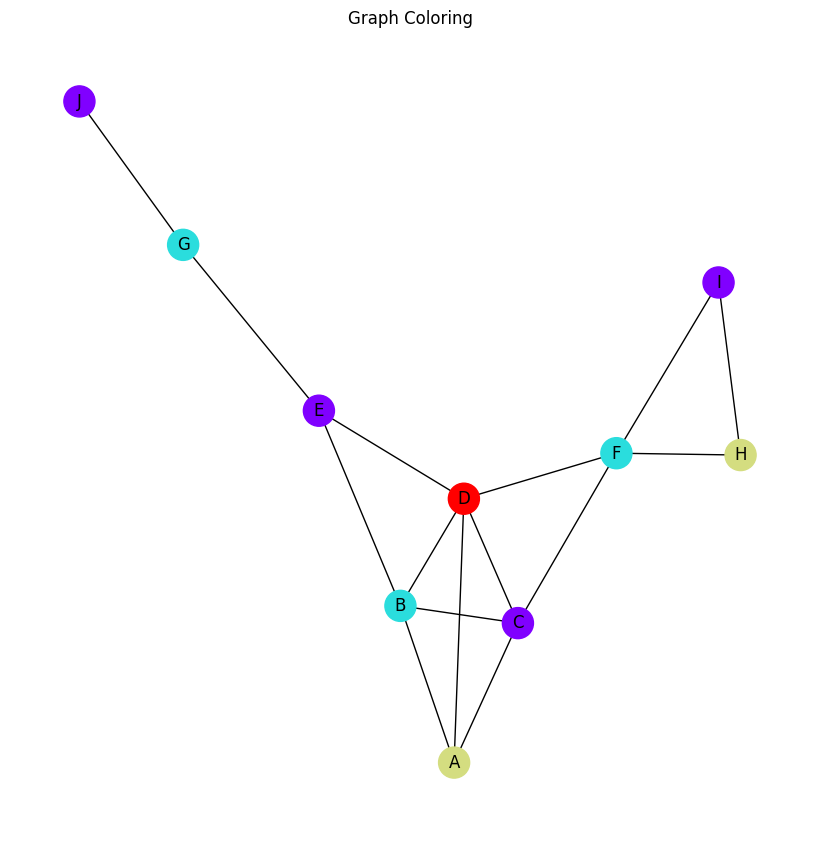

({'A': 2,
  'B': 1,
  'C': 0,
  'D': 3,
  'E': 0,
  'F': 1,
  'G': 1,
  'H': 2,
  'I': 0,
  'J': 0},
 0)

In [3]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

def is_feasible(solution, graph):
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if solution[node] == solution[neighbor]:
                return False
    return True

def calc_solution_value(solution, graph):
    conflicts = 0
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            if solution[node] == solution[neighbor]:
                conflicts += 1
    return conflicts

def initialize(graph):
    num_colors = len(graph)  # Broj čvorova u grafu
    colors = list(range(num_colors))
    return {node: random.choice(colors) for node in graph}

def make_small_change(solution, graph):
    new_solution = deepcopy(solution)
    node = random.choice(list(graph.keys()))
    neighbor_colors = set(new_solution[neighbor] for neighbor in graph[node])
    available_colors = [color for color in range(len(graph)) if color not in neighbor_colors]
    # Umesto nasumičnog odabira, odaberite boju koja minimizuje broj konflikata
    best_color = None
    min_conflicts = float('inf')
    for color in available_colors:
        new_solution[node] = color
        conflicts = calc_solution_value(new_solution, graph)
        if conflicts < min_conflicts:
            min_conflicts = conflicts
            best_color = color
    new_solution[node] = best_color
    return new_solution

def simulated_annealing(graph, num_iters, cooling_rate):
    solution = initialize(graph)
    value = calc_solution_value(solution, graph)
    best_solution = deepcopy(solution)
    best_value = value
    
    values = [None for _ in range(num_iters)]
    for i in range(1, num_iters + 1):
        new_solution = make_small_change(solution, graph)
        new_value = calc_solution_value(new_solution, graph)
        delta_E = new_value - value
        
        if delta_E < 0 or random.random() < pow(2.7, -delta_E / i):
            value = new_value
            solution = deepcopy(new_solution)
            # Ažuriraj najbolje rešenje ako nova vrednost konflikta nije gora od trenutne
            if new_value <= best_value:
                best_value = new_value
                best_solution = deepcopy(new_solution)
        
        values[i - 1] = value

        num_colors_used = len(set(best_solution.values()))
        print(f"Iteration: {i}, Num colors used: {num_colors_used}, Conflict: {value}")
        

    print("Best Solution:")
    for node, color in best_solution.items():
        print(f"Node {node}: Color {color}")
    print("Best Conflict:", best_value)

    num_colors_used = len(set(best_solution.values()))
    print("Number of colors used:", num_colors_used)

    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    pos = nx.spring_layout(G)  # Pozicioniranje čvorova
    node_colors = [best_solution[node] for node in G.nodes]  # Boje čvorova

    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.title('Graph Coloring')
    plt.show()

    return best_solution, best_value


graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}

num_iters = 1000
cooling_rate = 0.002

simulated_annealing(graph, num_iters, cooling_rate) 